In [48]:
!pip install openpyxl

In [49]:
import openpyxl

# Create a new Excel file
excel_file = openpyxl.Workbook()
excel_sheet = excel_file.active

# Add data (append a row as a list of values)
excel_sheet.append(['data1', 'data2', 'data3'])

# Save the Excel file
excel_file.save('tmp.xlsx')

# Close the Excel file
excel_file.close()

In [50]:
# Define a function to write a list of data into an Excel file
import openpyxl
import requests
from bs4 import BeautifulSoup

def write_excel_template(filename, sheetname, listdata):
    # Create a new Excel workbook
    excel_file = openpyxl.Workbook()
    excel_sheet = excel_file.active

    # Set column width for better readability
    excel_sheet.column_dimensions['A'].width = 100
    
    # Rename the sheet if a name is provided
    if sheetname != '':
        excel_sheet.title = sheetname
    
    # Append data row by row
    for item in listdata:
        excel_sheet.append(item)

    # Save the Excel file
    excel_file.save(filename)

    # Close the Excel file
    excel_file.close()

<style>
img {
  max-width: 900px;
  height: auto;
}
</style>
## Save Excel file 
A sample program to navigate multiple pages within a blog, retrieve the title, author, post date, and tag list from each page, and save the retrieved data into an Excel file.
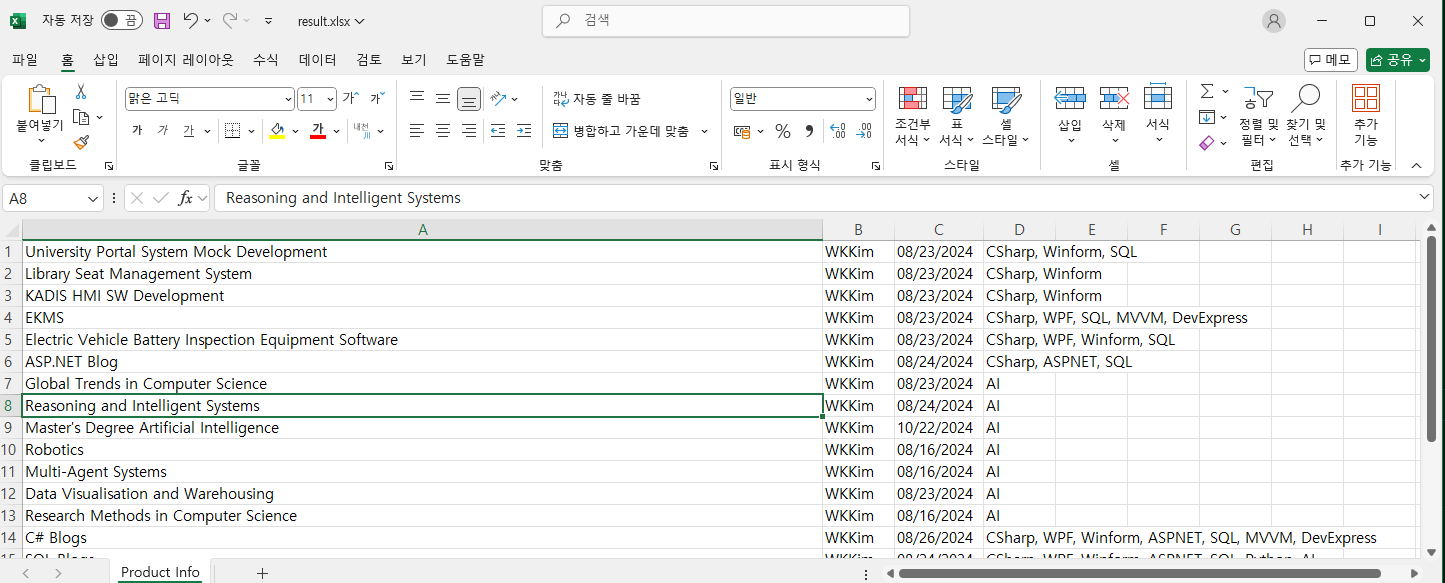

In [51]:
# List to store product details
product_list = []

# List of URL handles to iterate over
page_list = ['Winform_UPS', 'Winform_LSMS', 'Winform_KADIS', 'WPF_EKMS', 'Winform_EOL', 'ASP_Blog', 'AI_GTCS', 
             'AI_Reasoning', 'AI', 'AI_Robotics', 'AI_MAS', 'AI_DVW', 'AI_RMCS', 'CSharp', 'SQL', 'Python', 
             'AI_ML', 'AI_NLP', 'AI_Dissertation']

# Loop through the list of URL handles to scrape data from each page
for url_handle in page_list:
    if url_handle is None:
        # If no specific URL handle is provided, access the main page
        res = requests.get('https://www.woongkeol.com')
    else:
        # Access a specific page using the URL handle
        res = requests.get(f'https://www.woongkeol.com/Blogs?urlHandle={url_handle}')
    
    soup = BeautifulSoup(res.content, 'html.parser')

    # Extract the blog post title
    title = soup.select_one('h1.mb-3')
    
    # Extract additional information (author and post date)
    post_info = soup.select('span.text-secondary')
    auth = post_info[0].get_text().strip()  # Extract author name
    date = post_info[1].get_text().strip()  # Extract post date
    
    # Extract tags and combine them into a single string
    tags = soup.select('span.badge.bg-secondary.m-1')
    tag_text = ', '.join(tag.get_text().strip() for tag in tags)
    
    # Append the extracted data to the product list
    product_list.append([title.get_text().strip(), auth, date, tag_text])

# Write the extracted data to an Excel file
write_excel_template('result.xlsx', 'Product Info', product_list)


## Load Excel file 

In [52]:
# Load the Excel file to read the data
read_excel_file = openpyxl.load_workbook('result.xlsx')

# Display all sheet names in the workbook (returns a list of sheet names)
read_excel_file.sheetnames 

# Select the specific sheet named "Product Info" to read data
read_excel_sheet = read_excel_file["Product Info"]

# Iterate through each row in the sheet and print its content
## Each `row` is a tuple containing cell values from one row
## Convert each cell value to a string and join them with a comma
for row in read_excel_sheet.rows:
    print(', '.join(str(cell.value) for cell in row))

# Close the Excel file after completing the reading operation
read_excel_file.close()


University Portal System Mock Development, WKKim, 08/23/2024, CSharp, Winform, SQL
Library Seat Management System, WKKim, 08/23/2024, CSharp, Winform
KADIS HMI SW Development, WKKim, 08/23/2024, CSharp, Winform
EKMS, WKKim, 08/23/2024, CSharp, WPF, SQL, MVVM, DevExpress
Electric Vehicle Battery Inspection Equipment Software, WKKim, 08/23/2024, CSharp, WPF, Winform, SQL
ASP.NET Blog, WKKim, 08/24/2024, CSharp, ASPNET, SQL
Global Trends in Computer Science, WKKim, 08/23/2024, AI
Reasoning and Intelligent Systems, WKKim, 08/24/2024, AI
Master's Degree Artificial Intelligence, WKKim, 10/22/2024, AI
Robotics, WKKim, 08/16/2024, AI
Multi-Agent Systems, WKKim, 08/16/2024, AI
Data Visualisation and Warehousing, WKKim, 08/23/2024, AI
Research Methods in Computer Science, WKKim, 08/16/2024, AI
C# Blogs, WKKim, 08/26/2024, CSharp, WPF, Winform, ASPNET, SQL, MVVM, DevExpress
SQL Blogs, WKKim, 08/24/2024, CSharp, WPF, Winform, ASPNET, SQL, Python, AI
Python Blogs, WKKim, 08/24/2024, SQL, Python, AI